# ULTIMATE CHALLENGE
## PART 1. TIME SERIES ANALYSIS

In [1]:
# importing modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
plt.rc('figure', figsize=(14.0, 7.0))

In [2]:
df_stamps = pd.read_json('logins.json', convert_dates=True) #reading data
df_stamps.sort_values(by='login_time') #sorting by date

,login_time
6,1970-01-01 20:12:16
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
3,1970-01-01 20:16:36
2,1970-01-01 20:16:37
...,...
93136,1970-04-13 18:48:52
93137,1970-04-13 18:50:19
93139,1970-04-13 18:54:02
93141,1970-04-13 18:54:23


In [3]:
df_stamps.head() #earliest dates

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [4]:
df_stamps.tail() #latest dates

,login_time
93137,1970-04-13 18:50:19
93138,1970-04-13 18:43:56
93139,1970-04-13 18:54:02
93140,1970-04-13 18:57:38
93141,1970-04-13 18:54:23


In [5]:
# we have 93124 entries
df_stamps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [6]:
#resampling to get 15-minutes intervals, then counting logins in each 15 minutes interval
df_res = df_stamps.resample('15T', on='login_time').count().rename(columns={'login_time':'login_count'})

In [7]:
df_res.head()

,login_count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


In [8]:
# after resampling we have 9788 entries
df_res.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9788 entries, 1970-01-01 20:00:00 to 1970-04-13 18:45:00
Freq: 15T
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   login_count  9788 non-null   int64
dtypes: int64(1)
memory usage: 152.9 KB


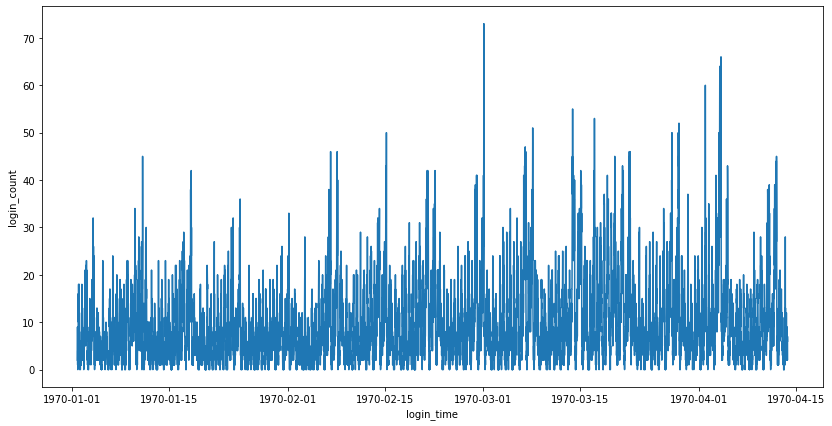

In [9]:
#visualizing the whole dataframe
sns.lineplot(x='login_time', y='login_count', data=df_res);

We can clearly see some seasonality on the plot. Now let's zoom in and look at 1 day period.

In [10]:
one_day1 = df_res.loc['1970-01-02 00:15:00':'1970-01-02 23:45:00']
print(one_day1.head(1))
print('')
print(one_day1.tail(1))

                     login_count
login_time                      
1970-01-02 00:15:00           18

                     login_count
login_time                      
1970-01-02 23:45:00           15


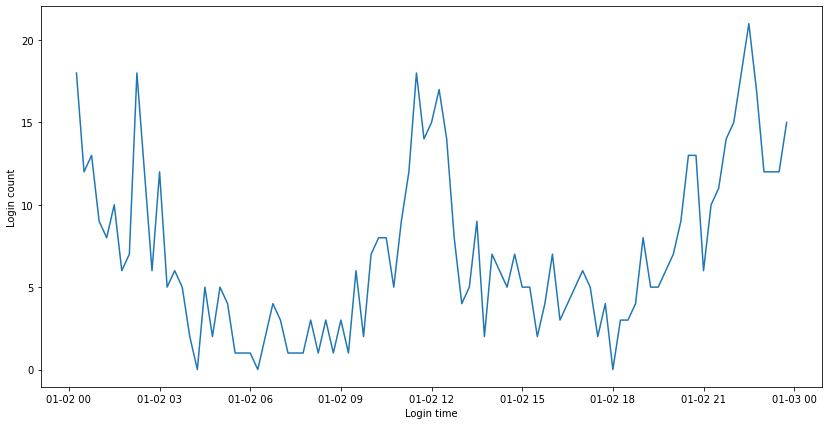

In [11]:
plt.plot(one_day1)
plt.xlabel('Login time')
plt.ylabel('Login count')
plt.show()

It seems like there are two peaks - each takes place approximately 12 hours from the previous one. Let's take a look at some more one day periods.

In [12]:
def plot_days(subset):
    # this function plots one day period subsets of the time series
    print(subset.head(1))
    print('')
    print(subset.tail(1))
    plt.figure(figsize=(12,6))
    plt.plot(subset)
    plt.xlabel('Login time')
    plt.ylabel('Login count')
    plt.show()
    print('=============================================================================================\n')
    
subsets_days = [df_res.loc['1970-02-15 00:15:00':'1970-02-15 23:45:00'],
           df_res.loc['1970-03-07 00:15:00':'1970-03-07 23:45:00'],
           df_res.loc['1970-04-10 00:15:00':'1970-04-10 23:45:00']]

                     login_count
login_time                      
1970-02-15 00:15:00           20

                     login_count
login_time                      
1970-02-15 23:45:00           14


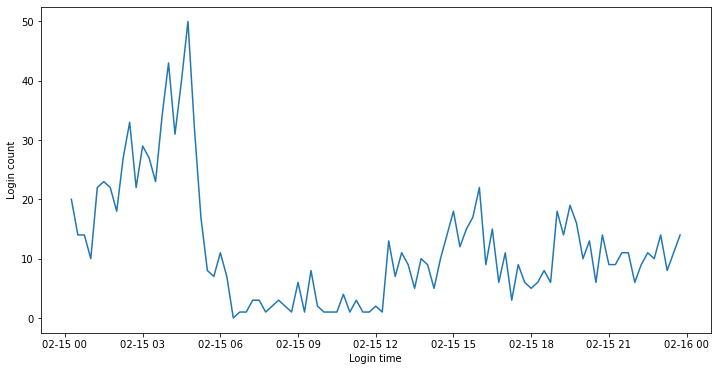


                     login_count
login_time                      
1970-03-07 00:15:00           20

                     login_count
login_time                      
1970-03-07 23:45:00           14


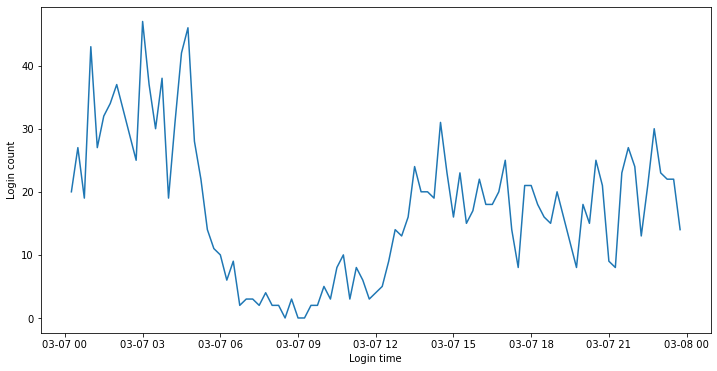


                     login_count
login_time                      
1970-04-10 00:15:00           15

                     login_count
login_time                      
1970-04-10 23:45:00           17


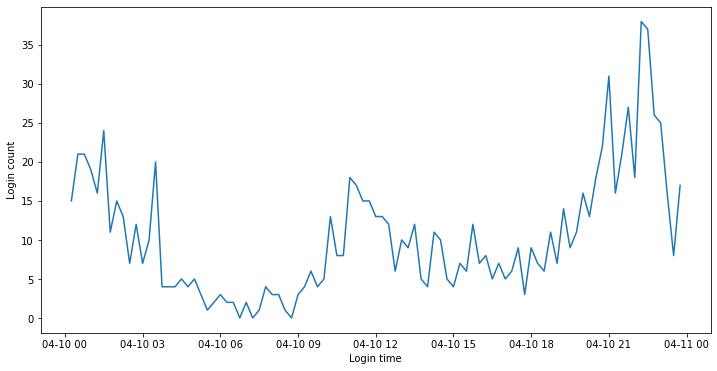

In [13]:
# visualizig the one day periods
for subset in subsets_days:
    plot_days(subset)

According to the plots, it seems like the activity peaks approximately every 12 hours. First peak tends to be on the early morning and the second peak on the early afternoon. Now let's take a look at longer periods and see how the activity changes during a week.

In [14]:
def plot_weeks(subset):
    # this function plots one week period subsets of the time series
    print(subset.head(1))
    print('')
    print(subset.tail(1))
    plt.figure(figsize=(12,6))
    plt.plot(subset)
    plt.xlabel('Login time')
    plt.ylabel('Login count')
    plt.show()
    print('=============================================================================================\n')
    
subsets_weeks = [df_res.loc['1970-01-02 00:15:00':'1970-01-08 23:45:00'],
            df_res.loc['1970-02-15 00:15:00':'1970-02-23 23:45:00'],
           df_res.loc['1970-03-07 00:15:00':'1970-03-15 23:45:00'],
           df_res.loc['1970-04-03 00:15:00':'1970-04-11 23:45:00']]

                     login_count
login_time                      
1970-01-02 00:15:00           18

                     login_count
login_time                      
1970-01-08 23:45:00           11


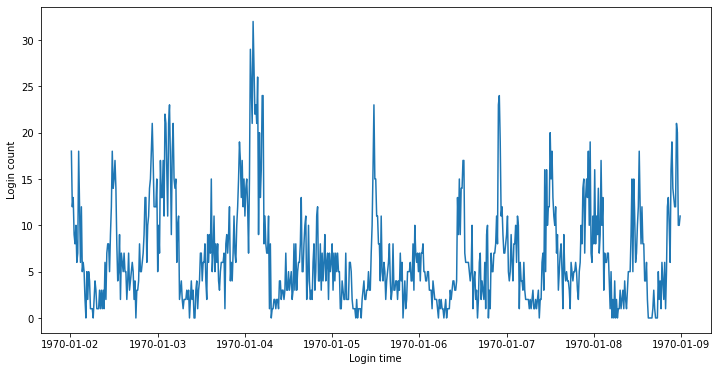


                     login_count
login_time                      
1970-02-15 00:15:00           20

                     login_count
login_time                      
1970-02-23 23:45:00           10


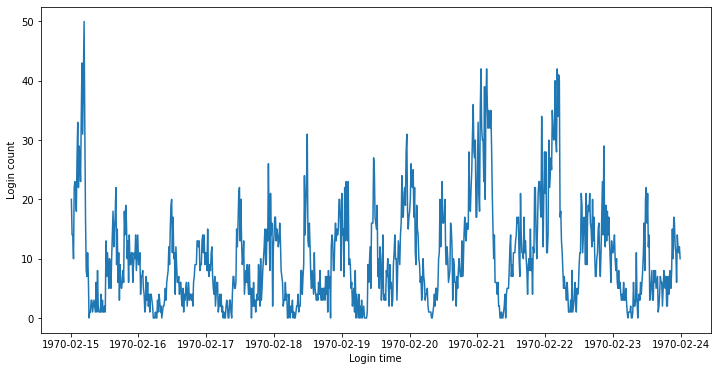


                     login_count
login_time                      
1970-03-07 00:15:00           20

                     login_count
login_time                      
1970-03-15 23:45:00           18


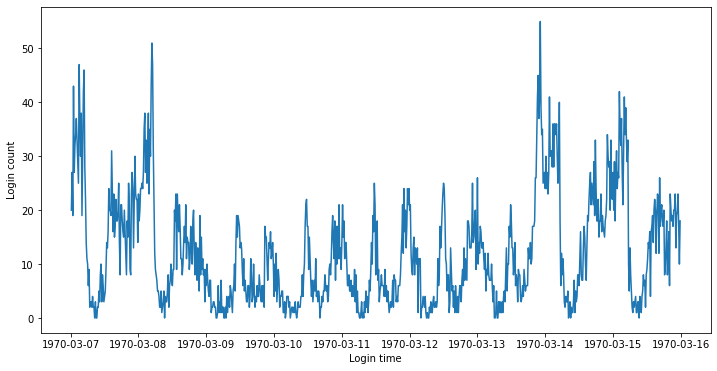


                     login_count
login_time                      
1970-04-03 00:15:00           16

                     login_count
login_time                      
1970-04-11 23:45:00           19


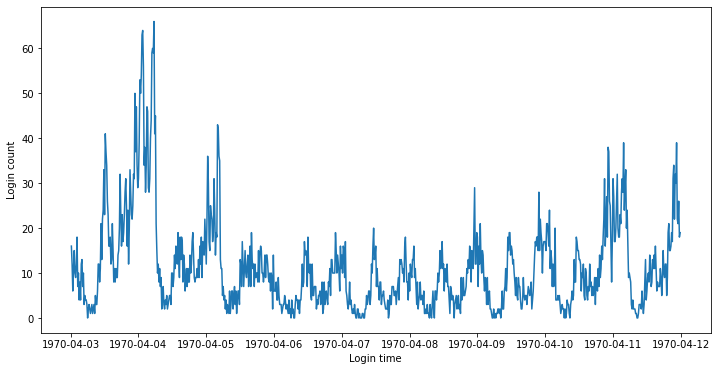

In [15]:
for subset in subsets_weeks:
    plot_weeks(subset)

Here we can see that usually there are two days in a row where the activity peaks and then slows down. I would assume those two days are weekend - it makes sense that the people are more active when they are not busy with work. Then, after the weekend ends, user activity slows down. In order to see if this is correct let's check what days the users are the most active.

In [16]:
# resampling the original dataframe to get one day periods, then counting amount of logins for each day
df_days = df_stamps.resample('d', on='login_time').count().rename(columns={'login_time':'login_count'})

In [17]:
print(df_days.head(3))
print(df_days.tail(3))

            login_count
login_time             
1970-01-01          112
1970-01-02          681
1970-01-03          793
            login_count
login_time             
1970-04-11         1352
1970-04-12         1409
1970-04-13          395


In [18]:
# we have 103 entries in our resampled timeseries
df_days.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 103 entries, 1970-01-01 to 1970-04-13
Freq: D
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   login_count  103 non-null    int64
dtypes: int64(1)
memory usage: 1.6 KB


In [19]:
# finding 10 days with maximum user activity
df_max = df_days.sort_values(by='login_count', ascending=False)[:10]

In [20]:
print(df_max)

            login_count
login_time             
1970-04-04         1889
1970-03-14         1706
1970-03-07         1666
1970-03-15         1565
1970-03-29         1523
1970-04-03         1504
1970-03-28         1488
1970-03-21         1485
1970-02-21         1479
1970-03-22         1472


In [21]:
#what day of the week are those?
for day in df_max.index:
    print(df_max.index[0].day_name())

Saturday
Saturday
Saturday
Saturday
Saturday
Saturday
Saturday
Saturday
Saturday
Saturday


Amazing, but all 10 of the days with maximum amount of logins turned out to be Saturdays.

### Conclusion

After analyzing the time series we can tell that the data shows two trends. First, there is daily seasonality - user activity usually has two peaks, each approximately 12 hours from each other (those two being early morning/late nigh and early afternoon). The second trend is that users are more active on weekends than on weekdays, with Saturday being the busiest day.